In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-cover-type-dataset/covtype.csv


# Dataset

In [2]:
df = pd.read_csv("/kaggle/input/forest-cover-type-dataset/covtype.csv")

df[:10]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.shape

(581012, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

# Some EDA

In [6]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

### check for all the uniqe values within the soils feature and distance

In [7]:
# Iterate over each column and print unique values

# for column in df.columns:
    # unique_values = df[column].unique()
    # print(f"Unique values in '{column}': {unique_values}")

# that was a lot of numbers, so i will comment the cell, but i get what i wanted

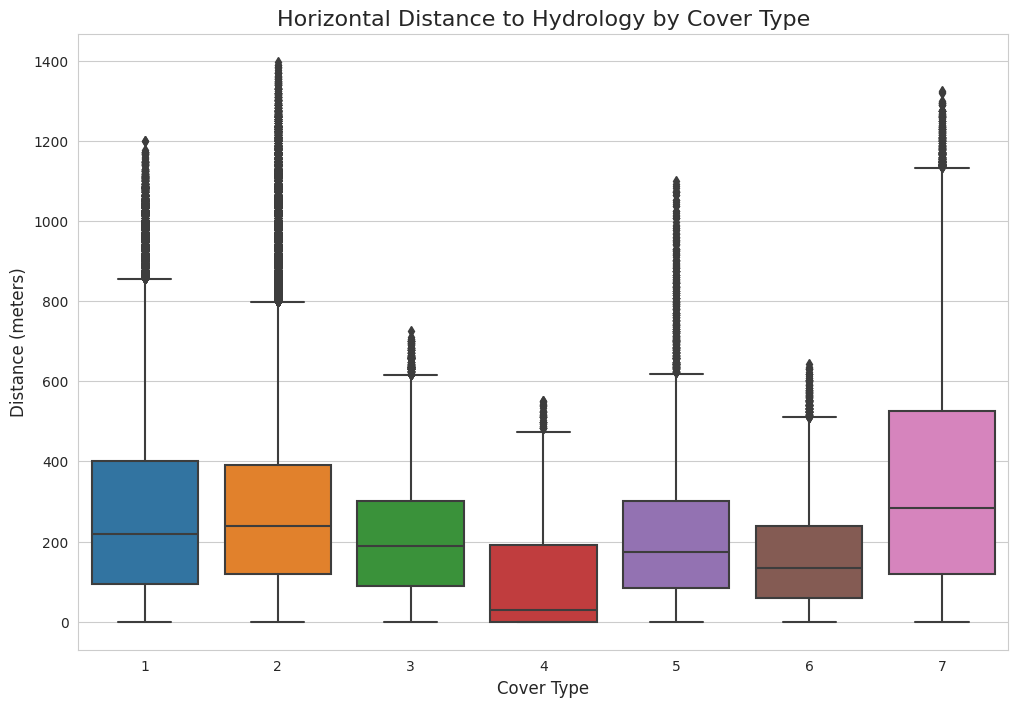

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df)
plt.title('Horizontal Distance to Hydrology by Cover Type', fontsize=16)
plt.xlabel('Cover Type', fontsize=12)
plt.ylabel('Distance (meters)', fontsize=12)
plt.show()



## Train the model

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Training the Random Forest model...
Model training complete!


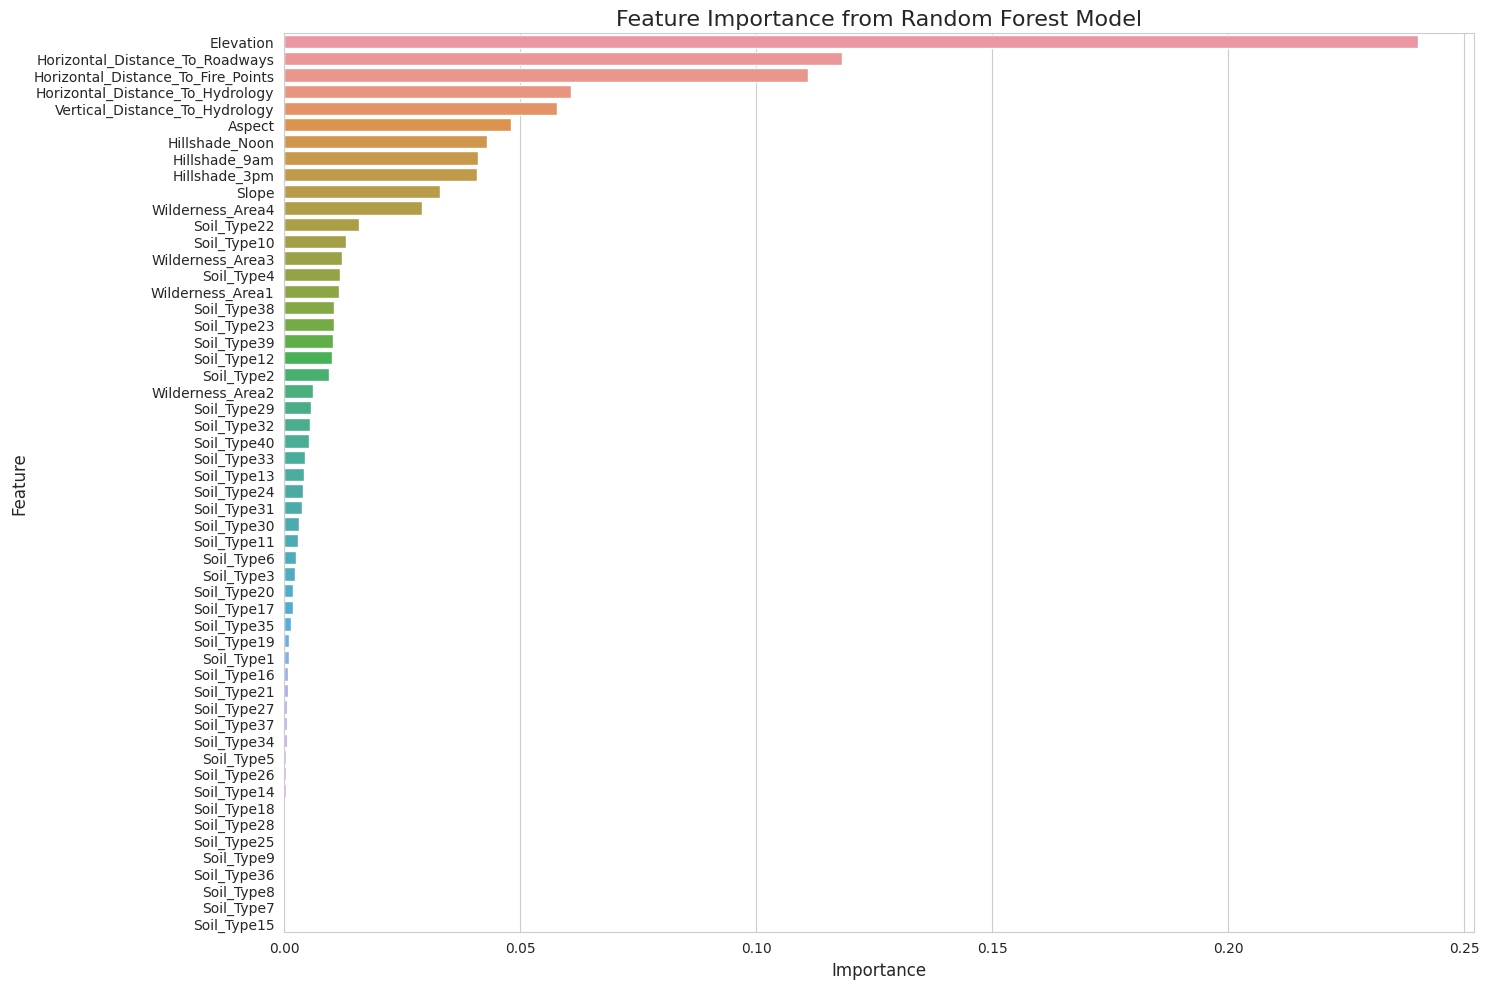


--- Model Performance ---
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Separate Features (X) and Target (y) ---
# 'Cover_Type' is your target variable, and all other columns are features.
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# --- 2. Identify Numerical Features for Scaling ---
numerical_features = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# --- 3. Split the Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Scale the Numerical Features ---
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#  Train a Random Forest Model 

# n_estimators=100 means we'll use 100 decision trees to make predictions.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Training the Random Forest model...")
model.fit(X_train, y_train)
print("Model training complete!")

# 6. Get and Visualize Feature Importance

# The model will tell us which features it found most important.
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# 7. Evaluate the Model's Performance 

# Let's quickly see how well the model did.
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print("\n--- Model Performance ---")
print(classification_report(y_test, y_pred))


## Use the important features

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

important_features = [
    'Elevation',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Aspect',
    'Hillshade_Noon',
    'Hillshade_9am',
    'Hillshade_3pm',
    'Slope',
    'Wilderness_Area1',
    'Wilderness_Area2',
    'Wilderness_Area3',
    'Wilderness_Area4'
]

# --- 2. Separate the selected features (X) and the target (y) ---
X = df[important_features]
y = df['Cover_Type']

# --- 3. Identify Numerical Features for Scaling from the new list ---
# The wilderness areas are already binary (0 or 1), so they don't need scaling.
numerical_features_to_scale = [
    'Elevation',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Aspect',
    'Hillshade_Noon',
    'Hillshade_9am',
    'Hillshade_3pm',
    'Slope'
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)





In [12]:
#  Scale  the numerical features
scaler = StandardScaler()
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])


In [13]:
print("Training a new Random Forest model with important features...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("New model training complete!")


Training a new Random Forest model with important features...
New model training complete!


In [14]:
#  7. Evaluate the new model's performance 
y_pred = model.predict(X_test)
print("\n--- New Model Performance with Important Features Only ---")
print(classification_report(y_test, y_pred))



--- New Model Performance with Important Features Only ---
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.93      0.96      0.94      7151
           4       0.88      0.82      0.85       549
           5       0.95      0.74      0.83      1899
           6       0.93      0.88      0.90      3473
           7       0.98      0.94      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.94      0.89      0.91    116203
weighted avg       0.95      0.95      0.95    116203



# Bonus

## Compare different models (e.g., Random Forest vs. XGBoost)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

## Random Forest Model

In [16]:
print("Training Random Forest Classifier (Baseline)...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)

Training Random Forest Classifier (Baseline)...
Random Forest Performance:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.93      0.95      0.94      7151
           4       0.86      0.81      0.84       549
           5       0.95      0.76      0.84      1899
           6       0.93      0.87      0.90      3473
           7       0.98      0.94      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.94      0.89      0.91    116203
weighted avg       0.95      0.95      0.95    116203

--------------------------------------------------


## XGBOOST

In [17]:
# Now let's try XGBoost, a powerful gradient boosting algorithm
print("Training XGBoost Classifier...")
# We need to calculate a scale_pos_weight for XGBoost to handle the imbalance
# The target variable `y` is 1-indexed, but XGBoost expects 0-indexed classes
y_train_xgb = y_train - 1
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y_train_xgb.unique()),
    eval_metric='merror',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test) + 1  # Convert back to 1-indexed for comparison
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("-" * 50)


Training XGBoost Classifier...
XGBoost Performance:
              precision    recall  f1-score   support

           1       0.85      0.83      0.84     42368
           2       0.86      0.89      0.87     56661
           3       0.88      0.90      0.89      7151
           4       0.86      0.85      0.86       549
           5       0.88      0.54      0.67      1899
           6       0.84      0.76      0.80      3473
           7       0.95      0.87      0.91      4102

    accuracy                           0.86    116203
   macro avg       0.87      0.81      0.83    116203
weighted avg       0.86      0.86      0.86    116203

--------------------------------------------------


## Explain! <3

### OK, MY FRIEND I WANT TO TELL YOU SOMETHING

#### HERE: # We need to calculate a scale_pos_weight for XGBoost to handle the imbalance
#### LOOK IN XGBOOST, THERE IS A POWERFUL THING THAT IS STAND WITH PEOPLE WHO ARE WEEK, OR HAVE LESS FAM (LOW SAMPLES), SO BY THIS XGBOOST WILL GIVE 'EM ATTENTION
#### XGBOOST IS A GOOD PERSOM

#### OK: FOR THIS "# The target variable `y` is 1-indexed, but XGBoost expects 0-indexed classes", LISEN  IN XGBOOST, IT EXPECT YOU TO START FROM ZERO, THAT'S THE RESON WE SUBTRACT 1, SO INSTEAD OF HAVING 1 TO 7 LABELS, WE WILL MAKE IT 0 TO 6 LABELS, AND THEN RETURN THEM BACK!

# Perform hyperparameter tuning

In [18]:
print("Starting Hyperparameter Tuning for Random Forest...")
# Define a parameter grid to search over. This can be time-consuming.
# We'll choose a small, but reasonable, grid to demonstrate the concept.
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

Starting Hyperparameter Tuning for Random Forest...


In [19]:
# Use GridSearchCV with our Random Forest model
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
    param_grid,
    cv=3,  
    scoring='f1_weighted', 
    n_jobs=-1,
    verbose=1
)

In [ ]:
print("Best hyperparameters found:", best_params)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
tuned_model.fit(X_train, y_train)
y_pred_tuned = tuned_model.predict(X_test)

print("-" * 50)
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_tuned))


# Observation